In [22]:
from scipy.constants import R

k1 = lambda k10, Ea, T: k10 * np.exp(-Ea / (R*1e-3 * T))

k1(3e5, 95, 280 + 273.15)

0.00032086968069172255

<AxesSubplot: >

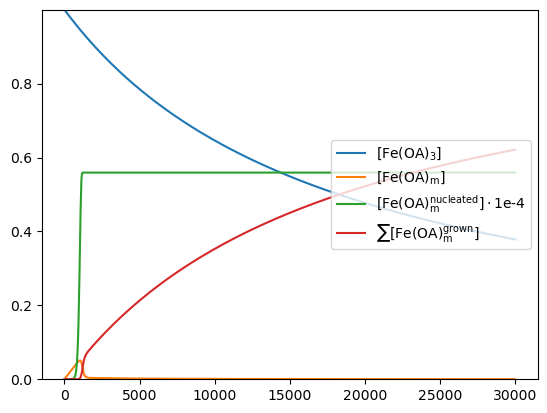

In [9]:
from rsc import read_results
from plots import time_vs_concentration, number_vs_size, time_vs_size, number_vs_size_scatter, number_vs_size, time_vs_saturation
import matplotlib.pyplot as plt
import numpy as np

path = 'results/DefaultParams_2023-02-23_18-03-51/'

df = read_results(f'{path}/data.h5')
fig, ax = plt.subplots()
time_vs_concentration(df, ax)

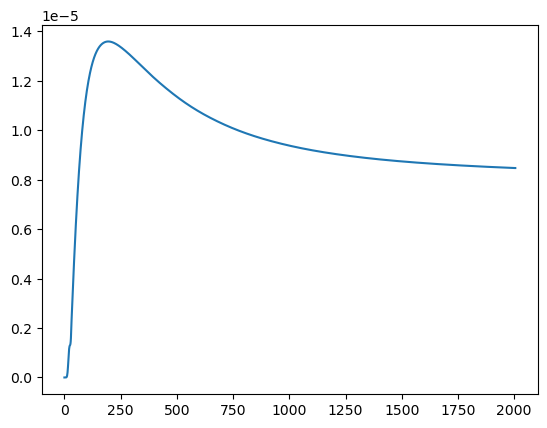

In [5]:
from rsc import read_results
from plots import time_vs_variance, num_vs_size_hist
import matplotlib.pyplot as plt
import numpy as np


df = read_results('./results/DefaultParams_2023-02-23_10-22-28/data.h5')


R_col = df.columns[df.columns.str.startswith('R')]
P_col = df.columns[df.columns.str.startswith('P')]
R = df[R_col].to_numpy() * 1e9
P = df[P_col].to_numpy()

cnd = P.sum(axis=1) > 0
R = R[cnd]
P = P[cnd]
t = df.t[cnd]
plt.plot(np.sum(P*(R - np.average(R, axis=1, weights=P).reshape(-1, 1))**2, axis=1))

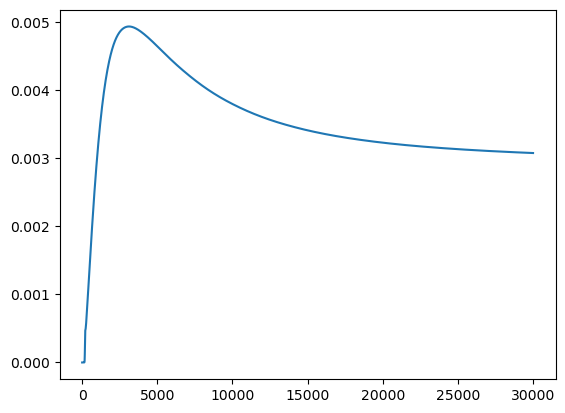

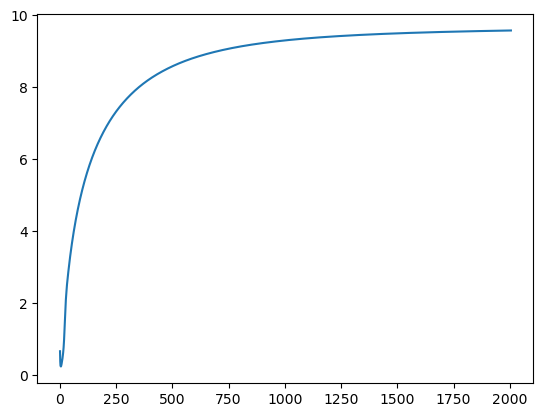

In [7]:
plt.plot(np.average(R, axis=1, weights=P))

No plot function defined for time_vs_PDI.
No plot function defined for R_vs_P_scatter.
No plot function defined for R_vs_P_histogram.


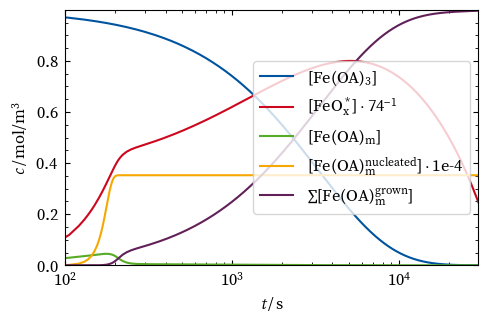

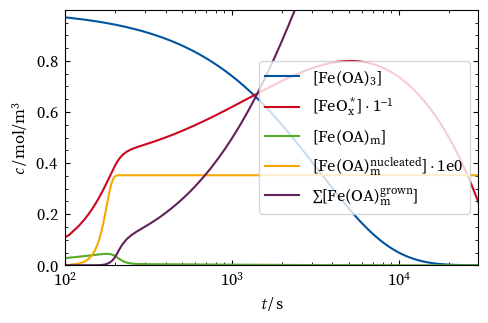

In [1]:
from rsc import read_results
from plots import PlotManager, Plot, time_vs_concentration, time_vs_saturation


df = read_results('./results/DefaultParams_2023-02-21_10-22-08/data.h5')


plots = [
    Plot('time_vs_concentration', 'time', 'conc', time_vs_concentration),
    Plot('time_vs_saturation', 'time', 'conc', time_vs_concentration),
    Plot('time_vs_PDI', 'time', 'pdi', None),
    Plot('R_vs_P_scatter', 'radius', 'number', None),
    Plot('R_vs_P_histogram', 'radius', 'number', None),
]
pm = PlotManager('/DefaultParams_2023-02-21_10-22-08/', plots)

pm.save_plots(df)

In [4]:
def plot_single(**kwargs):
    print(kwargs)
    return kwargs.get('xxlabel', '')
plot_single(xlabel='test')



{'xlabel': 'test'}


''

In [202]:

%matplotlib inline

from plots import num_vs_size_hist
from rsc import read_results

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
import numpy as np

def log_normal(x, mu, sig):
    f = 1 / (x * sig * (2 * np.pi)**0.5)

    exp = np.exp(
         - (np.log(x) - mu)**2 / 
         (2 * sig**2)
    )

    return f * exp

df = read_results('./results/DefaultParams_2023-02-21_10-22-08/data.h5')

mu_l = []
sig_l = []
for i in range(20, 1000):
    P_col, R_col = num_vs_size_hist(df, 1)

    R = df[P_col].iloc[i,:] * 1e9
    P = df[R_col].iloc[i,:]
    P = P



    #plt.hist(R , bins=20, weights=P, label='rel. freq. of Particle Size')



    #plt.hist(R , bins=10, weights=P, label='rel. freq. of Particle Size', density=True)

    bin_heights, bin_borders = np.histogram(R, bins=10, weights=P, density=True)
    bin_widths = np.diff(bin_borders)
    bin_centers = bin_borders[:-1] + bin_widths / 2
    popt, _ = curve_fit(log_normal, bin_centers, bin_heights, p0=[2.1, .1])

    #plt.plot(t, log_normal(t, *popt))
    mu, sig = popt
    mu_l.append(mu)
    sig_l.append(sig)

mu_l = np.array(mu_l)
sig_l = np.array(sig_l)


/home/ben/.conda/envs/py311/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [203]:
var = (np.exp(sig_l**2) - 1)*(np.exp(2*mu_l + sig_l**2))

/tmp/ipykernel_15593/2653151055.py:1: RuntimeWarning: overflow encountered in exp
  var = (np.exp(sig_l**2) - 1)*(np.exp(2*mu_l + sig_l**2))
/tmp/ipykernel_15593/2653151055.py:1: RuntimeWarning: overflow encountered in multiply
  var = (np.exp(sig_l**2) - 1)*(np.exp(2*mu_l + sig_l**2))


(0.0, 10.0)

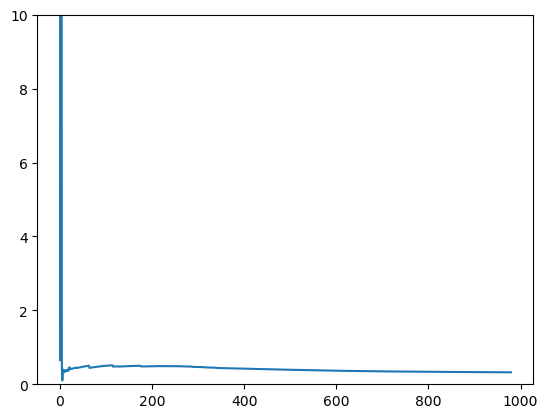

In [209]:
plt.plot(sig_l)
plt.ylim(0,10)

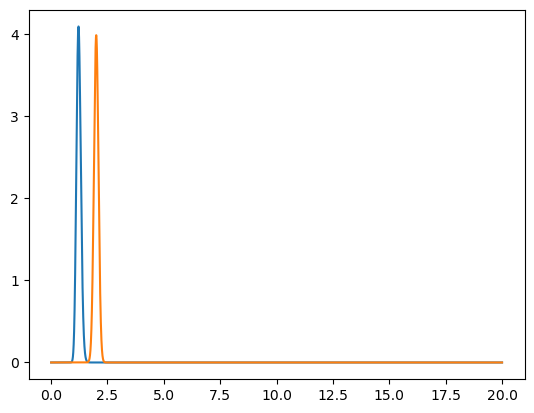

In [ ]:
def log_normal(x, mu, sig):
    x = np.array(x)
    f = 1 / (x * sig * (2 * np.pi)**0.5)

    exp = np.exp(
        - (np.log(x) - mu)**2 / 
        (2 * sig**2)
    )

    return f * exp

t = np.arange(0.001, 20, 0.001)
plt.plot(t, log_normal(t, 0.2, 0.08))
plt.plot(t, g(t, 2, 0.1))

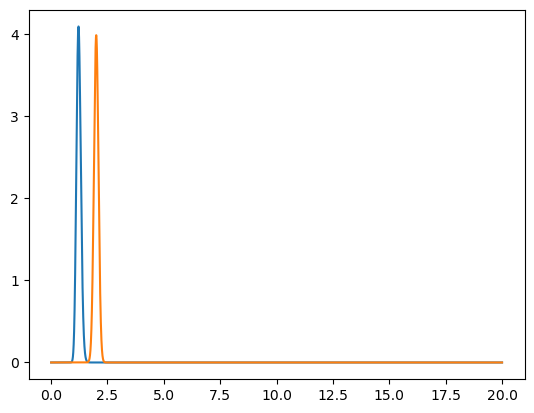

In [142]:
def log_normal(x, mu, sig):
    x = np.array(x)
    f = 1 / (x * sig * (2 * np.pi)**0.5)

    exp = np.exp(
        - (np.log(x) - mu)**2 / 
        (2 * sig**2)
    )

    return f * exp

t = np.arange(0.001, 20, 0.001)
plt.plot(t, log_normal(t, 0.2, 0.08))
plt.plot(t, g(t, 2, 0.1))

In [76]:
a

(nan, nan)

In [73]:
from scipy.optimize import curve_fit

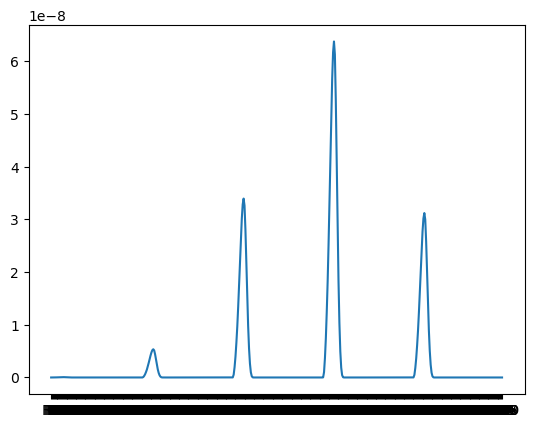

In [ ]:
%matplotlib inline

from plots import num_vs_size_hist
from rsc import read_results

import matplotlib.pyplot as plt

df = read_results('./results/DefaultParams_2023-02-21_10-22-08/data.h5')

P_col, R_col = num_vs_size_hist(df, 1)

plt.plot(df[R_col].iloc[-1,:])